In [8]:
import json
import pandas as pd

with open("/Users/lakshmiande/Desktop/sentiment analysis/james_smith_tweets.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data["dataplayer"])
print(df.head(10))


        id                                         text  \
0  1000000  James Smith’s game awareness is next level.   
1  1000001              Another fantastic week for him!   
2  1000002        He’s definitely an underrated player.   
3  1000003           He needs a break—looked exhausted.   
4  1000004           He needs a break—looked exhausted.   
5  1000005                He needs to step up his game.   
6  1000006        James Smith was MVP material tonight!   
7  1000007    James Smith with back-to-back touchdowns!   
8  1000008    James Smith deserves player of the month.   
9  1000009              He wasn’t in his element today.   

                    created_at  
0  2025-04-12T21:01:04.105762Z  
1  2025-04-12T20:51:04.105762Z  
2  2025-04-12T20:41:04.105762Z  
3  2025-04-12T20:31:04.105762Z  
4  2025-04-12T20:21:04.105762Z  
5  2025-04-12T20:11:04.105762Z  
6  2025-04-12T20:01:04.105762Z  
7  2025-04-12T19:51:04.105762Z  
8  2025-04-12T19:41:04.105762Z  
9  2025-04-12T19:31:

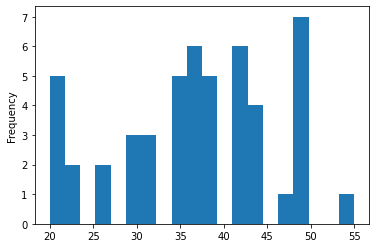

In [9]:
import matplotlib.pyplot as plt

df["text"].str.len().plot.hist(bins=20)
plt.show()


In [10]:
import re

def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["cleaned_text"] = df["text"].apply(clean_tweet)
print(df[["text","cleaned_text"]].head(10))


                                          text  \
0  James Smith’s game awareness is next level.   
1              Another fantastic week for him!   
2        He’s definitely an underrated player.   
3           He needs a break—looked exhausted.   
4           He needs a break—looked exhausted.   
5                He needs to step up his game.   
6        James Smith was MVP material tonight!   
7    James Smith with back-to-back touchdowns!   
8    James Smith deserves player of the month.   
9              He wasn’t in his element today.   

                                cleaned_text  
0  james smiths game awareness is next level  
1             another fantastic week for him  
2        hes definitely an underrated player  
3           he needs a breaklooked exhausted  
4           he needs a breaklooked exhausted  
5               he needs to step up his game  
6       james smith was mvp material tonight  
7     james smith with backtoback touchdowns  
8   james smith deserves p

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df["cleaned_text"].apply(get_sentiment)
df["compound_score"] = df["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
print(df.head(10))


        id                                         text  \
0  1000000  James Smith’s game awareness is next level.   
1  1000001              Another fantastic week for him!   
2  1000002        He’s definitely an underrated player.   
3  1000003           He needs a break—looked exhausted.   
4  1000004           He needs a break—looked exhausted.   
5  1000005                He needs to step up his game.   
6  1000006        James Smith was MVP material tonight!   
7  1000007    James Smith with back-to-back touchdowns!   
8  1000008    James Smith deserves player of the month.   
9  1000009              He wasn’t in his element today.   

                    created_at                               cleaned_text  \
0  2025-04-12T21:01:04.105762Z  james smiths game awareness is next level   
1  2025-04-12T20:51:04.105762Z             another fantastic week for him   
2  2025-04-12T20:41:04.105762Z        hes definitely an underrated player   
3  2025-04-12T20:31:04.105762Z           h

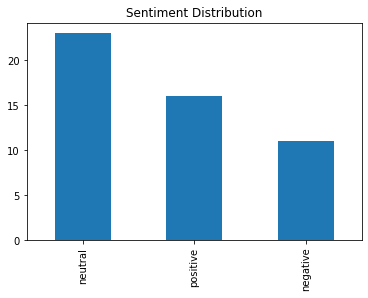

In [12]:
df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.show()


In [13]:
import pandas as pd  

df = pd.read_csv("james_smith_sentiment.csv")  
manual_df = pd.read_excel("/Users/lakshmiande/Desktop/sentiment analysis/manual_labels_corrected.xlsx")

df.set_index("id", inplace=True)  
manual_df.set_index("id", inplace=True)

df.update(manual_df[["sentiment"]])

df.reset_index(inplace=True)

df.to_csv("james_smith_final.csv", index=False)

print("Final file saved as 'james_smith_final.csv' with manual updates applied.")


Final file saved as 'james_smith_final.csv' with manual updates applied.


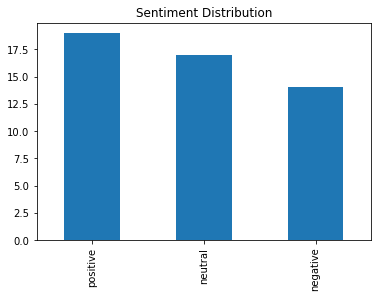

In [16]:
df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.show()
